In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir("../input"))

['san_francisco_street_trees.csv']


In [2]:
sftree = pd.read_csv("../input/san_francisco_street_trees.csv", header=0)
sftree.columns = ['Address', 'Care_assistant', 'Care_taker', 'dbh', 'Latitude', 'Legal_status', 'Location', 'Longitude', 'Permit_notes', 'Plant_date', 'Plant_type', 'Plot_size', 'Site_info', 'Site_order', 'Species', 'Tree_ID', 'X_coordinate', 'Y_coordinate']
sftree.head()

,Address,Care_assistant,Care_taker,dbh,Latitude,Legal_status,Location,Longitude,Permit_notes,Plant_date,Plant_type,Plot_size,Site_info,Site_order,Species,Tree_ID,X_coordinate,Y_coordinate
0,443 Naples St,NaN,Private,4.0,37.721689,Undocumented,(37.7216893346731 -122.430482526944),-122.430483,NaN,NaN,Tree,Width 4ft,Sidewalk: Curb side : Cutout,1.0,Tristaniopsis laurina :: Swamp Myrtle,180149,6.003355e+06,2.091004e+06
1,3630 Webster St,NaN,Private,3.0,37.804286,Undocumented,(37.8042860176436 -122.435150585742),-122.435151,NaN,NaN,Tree,Width 3ft,:,2.0,Cordyline australis :: Dracena Palm,126095,6.002627e+06,2.121101e+06
2,238 Downey St,NaN,Private,11.0,37.764730,Undocumented,(37.7647299507493 -122.446671573844),-122.446672,NaN,NaN,Tree,Width 3ft,Sidewalk: Curb side : Cutout,1.0,Melaleuca styphelliodes :: Paperbark Tree,233268,5.999000e+06,2.106770e+06
3,205 13th St,FUF,Private,NaN,37.769737,Permitted Site,(37.7697365039652 -122.417760336994),-122.417760,Permit Number 40934,1999-6-26 00:00:00,Tree,NaN,Sidewalk: Curb side : Cutout,6.0,Lophostemon confertus :: Brisbane Box,39456,6.007392e+06,2.108420e+06
4,2417 Harrison St,NaN,Private,11.0,37.758333,Undocumented,(37.7583327223052 -122.412354747671),-122.412355,NaN,NaN,Tree,Width 3ft,Sidewalk: Curb side : Cutout,2.0,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,237395,6.008870e+06,2.104236e+06


In [3]:
sftree.shape

(188462, 18)

In [4]:
# Examine data
print(len(sftree), " rows x ", len(sftree.columns), " columns")
print(sftree.columns)
sftree.info()
sftree.describe()

188462  rows x  18  columns
Index(['Address', 'Care_assistant', 'Care_taker', 'dbh', 'Latitude',
       'Legal_status', 'Location', 'Longitude', 'Permit_notes', 'Plant_date',
       'Plant_type', 'Plot_size', 'Site_info', 'Site_order', 'Species',
       'Tree_ID', 'X_coordinate', 'Y_coordinate'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188462 entries, 0 to 188461
Data columns (total 18 columns):
Address           186972 non-null object
Care_assistant    23266 non-null object
Care_taker        188462 non-null object
dbh               148730 non-null float64
Latitude          185937 non-null float64
Legal_status      188405 non-null object
Location          185937 non-null object
Longitude         185937 non-null float64
Permit_notes      50660 non-null object
Plant_date        64873 non-null object
Plant_type        188462 non-null object
Plot_size         139024 non-null object
Site_info         188462 non-null object
Site_order        187003 non-null fl

,dbh,Latitude,Longitude,Site_order,Tree_ID,X_coordinate,Y_coordinate
count,148730.000000,185937.000000,185937.000000,187003.000000,188462.000000,1.859370e+05,1.859370e+05
mean,10.115350,37.766614,-122.445747,4.596156,123753.070805,5.999711e+06,2.107692e+06
std,29.595983,0.252526,0.419945,12.619466,78000.465822,1.032527e+05,1.034768e+05
min,0.000000,37.509004,-138.283861,-50.000000,1.000000,2.109337e+06,2.013289e+06
25%,4.000000,37.740576,-122.454022,1.000000,51479.250000,5.996832e+06,2.097931e+06
50%,7.000000,37.760384,-122.431353,2.000000,117469.500000,6.003412e+06,2.105132e+06
75%,12.000000,37.779738,-122.412973,4.000000,199686.750000,6.008726e+06,2.112195e+06
max,9999.000000,47.270219,-122.366622,501.000000,253415.000000,6.022031e+06,6.005733e+06


In [5]:
# Make a copy of the data to work with.
sf_trees = sftree.copy()

In [6]:
# Clean data
sf_trees = sf_trees.loc[sf_trees['Latitude'] < 38.000000] # For some reason this goes all the way up to Seattle??
sf_trees = sf_trees.loc[sf_trees['Species'] != 'Tree(s) ::'] # Clean this bit of data

In [7]:
# This looks much more reasonable
sf_trees.describe()

,dbh,Latitude,Longitude,Site_order,Tree_ID,X_coordinate,Y_coordinate
count,146687.000000,175577.000000,175577.000000,174331.000000,175577.000000,1.755770e+05,1.755770e+05
mean,10.134818,37.760036,-122.434541,4.102873,127987.785815,6.002470e+06,2.104989e+06
std,29.781199,0.024222,0.029926,8.448780,78655.004455,8.659706e+03,8.811509e+03
min,0.000000,37.509004,-122.511257,0.000000,1.000000,5.980415e+06,2.013289e+06
25%,4.000000,37.740399,-122.454050,1.000000,51660.000000,5.996828e+06,2.097861e+06
50%,7.000000,37.760379,-122.431091,2.000000,124939.000000,6.003492e+06,2.105121e+06
75%,12.000000,37.779936,-122.412711,4.000000,203303.000000,6.008808e+06,2.112285e+06
max,9999.000000,37.809022,-122.366622,501.000000,253415.000000,6.021871e+06,2.122710e+06


In [8]:
# Count trees by species
species_count = sf_trees.groupby('Species').Tree_ID.count()
print("There are", len(species_count), "species of tree in San Francisco.")

There are 559 species of tree in San Francisco.


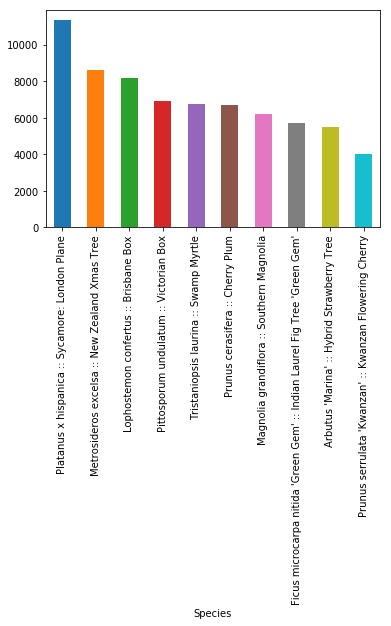

In [9]:
# Top 10 tree species in SF bar chart
top_ten_species = species_count.nlargest(10)
ax = top_ten_species.plot.bar()

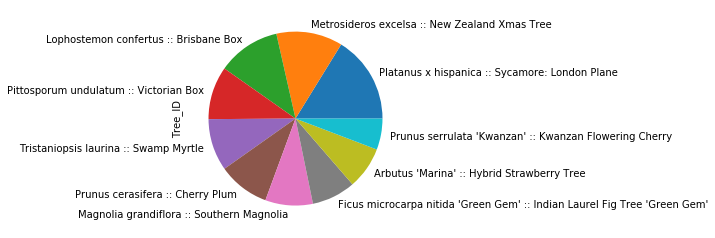

In [10]:
# Top 10 tree species in SF pie chart
ax = top_ten_species.plot.pie()

In [11]:
# Get dataframe where only popular trees are shown
popular_species = top_ten_species.index.tolist()
popular_species_df = sf_trees.loc[sf_trees['Species'].isin(popular_species)]
# display(popular_species_df)

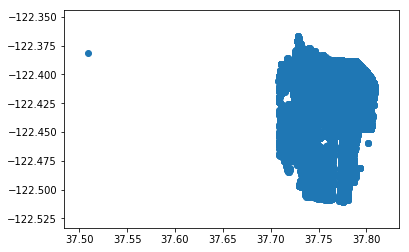

In [12]:
# Basic scatterplot of the top ten most popular trees in SF.
x, y = popular_species_df.Latitude.tolist(), popular_species_df.Longitude.tolist()
plt.scatter(x,y)

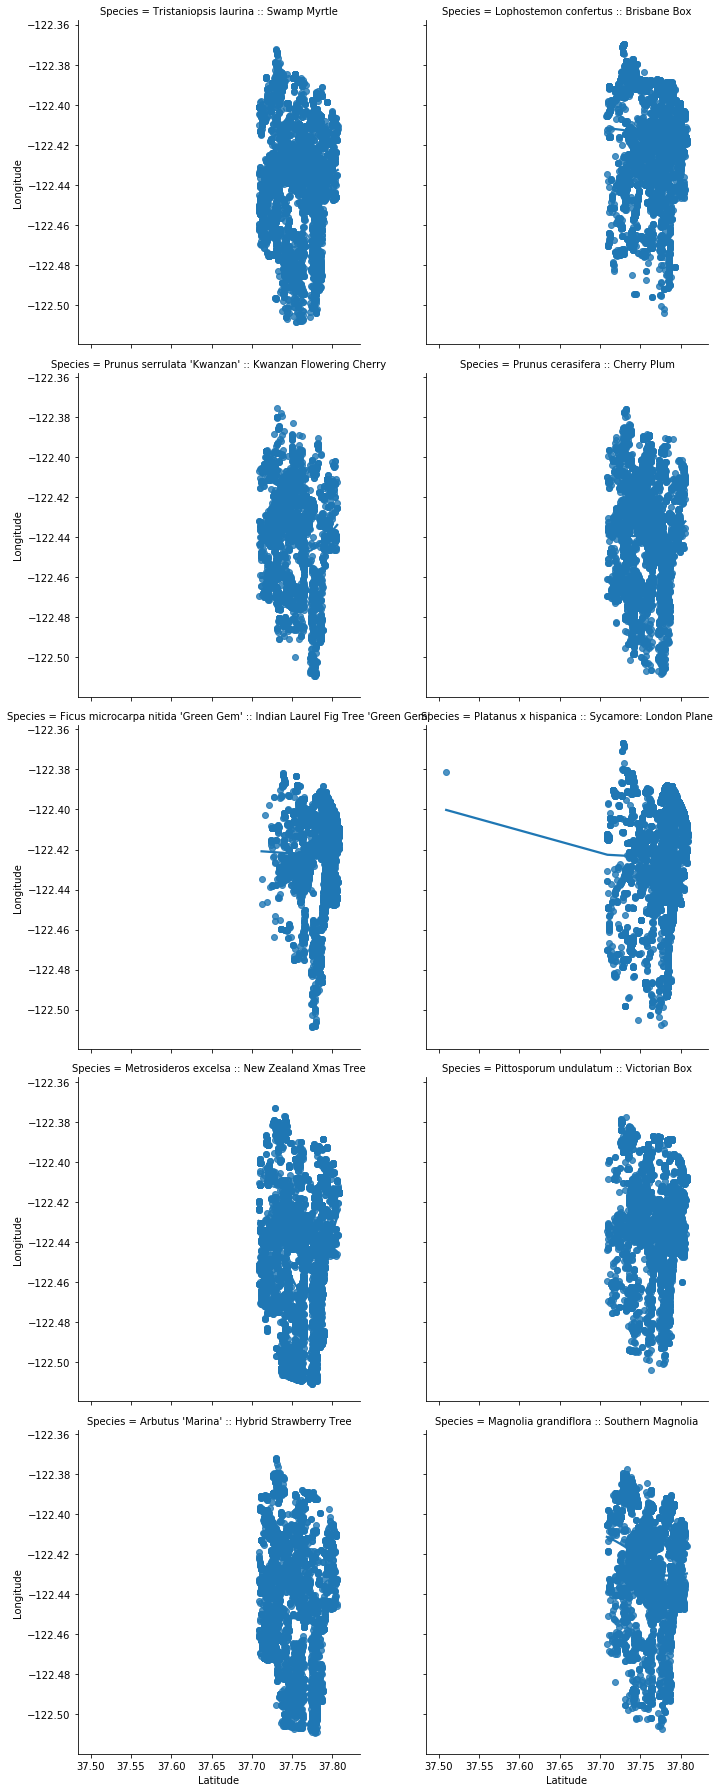

In [13]:
sns.lmplot(x="Latitude", y="Longitude", col="Species", data=popular_species_df,
          col_wrap=2, lowess=True)